In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

import viz
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [228]:
df = pd.read_csv('car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [229]:
df= wrangle.clean_cars(df)

In [230]:
train, validate, test = wrangle.split_cars(df)

In [231]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 513877 │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 23     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ year                │    0 │      0 │    2000 │     3.8 │   2000 │    2000 │    2000 │     2000 │    ▁▂▂█  │  │
│ │ condition           │    0 │      0 │     3.4 │    0.95 │      1 │     2.7 │     4.2 │        5 │   ▄▄▅█▅  │  │
│ │ odometer            │    0 │      0 │   66000 │   51000 │      1 │   28000 │   96000 │   500000 │   █▃▁    │  │
│ │ mmr                 │    0 │      0 │   14000 │    8700 │     25 │    7500 │   18000 │    77000 │   █▆▁    │  │
│ │ sellingprice        │    0 │      0 │   14000 │    8800 │      1 │    7300 │   18000 │    52000 │   ▆█▄▁   │  │
│ │ saleyear            │    0 │      0 │    2000 │    0.27 │   2000 │    2000 │    2000 │     2000 │  ▁    █  │  │
│ │ age_at_sale         │    0 │      0 │     4.7 │     3.8 │      1 │       2 │       7 │       25 │   █▂▂    │  │
│ │ miles_per_year      │    0 │      0 │   16000 │    9100 │      0 │   10000 │   20000 │   220000 │    █     │  │
│ └─────────────────────┴──────┴────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                       │      0 │          0 │                            1 │                   520000 │  │
│ │ model                      │      0 │          0 │                            1 │                   520000 │  │
│ │ trim                       │      0 │          0 │                            1 │                   520000 │  │
│ │ body                       │      0 │          0 │                            1 │                   520000 │  │
│ │ transmission               │      0 │          0 │                            1 │                   520000 │  │
│ │ vin                        │      0 │          0 │                            1 │                   520000 │  │
│ │ state                      │      0 │          0 │                            1 │                   520000 │  │
│ │ color                      │      0 │          0 │                            1 │                   520000 │  │
│ │ interior                   │      0 │          0 │  

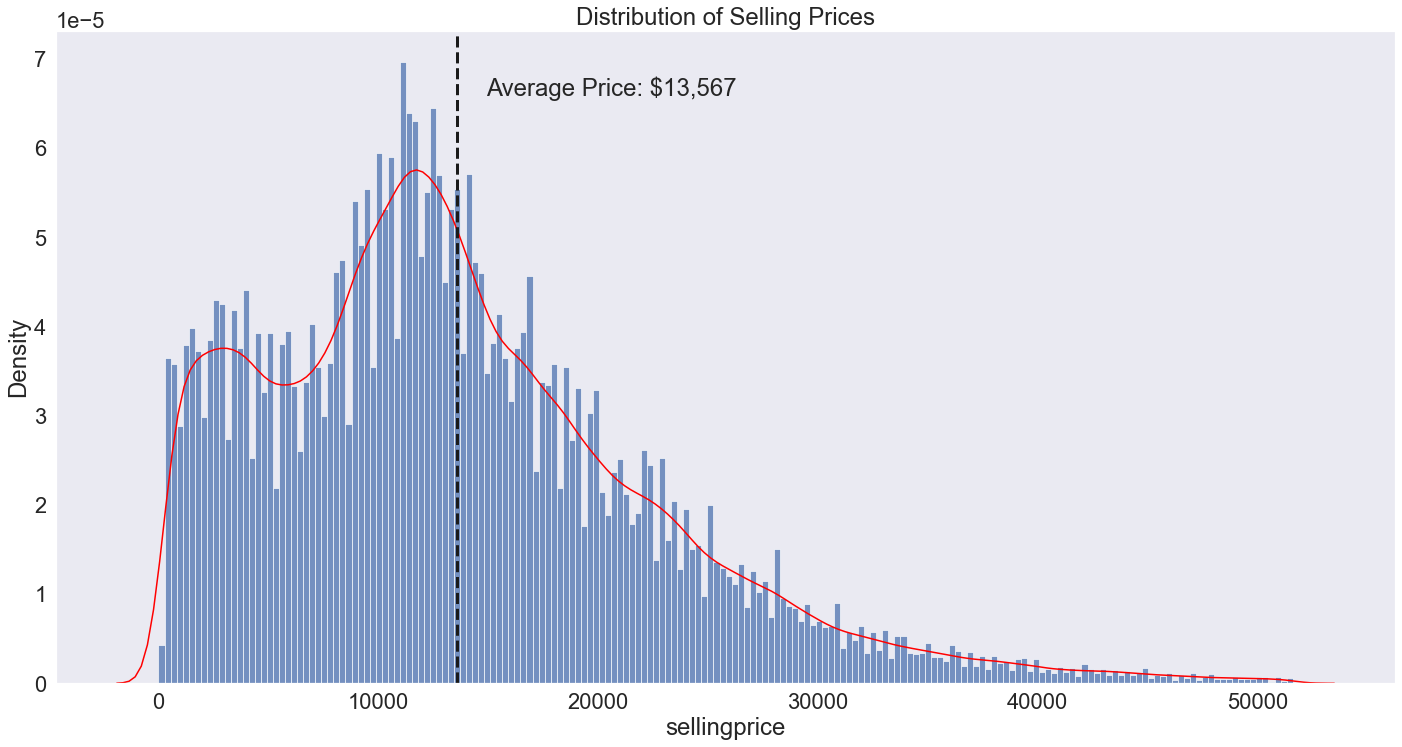

In [205]:
viz.plot_dist(df)

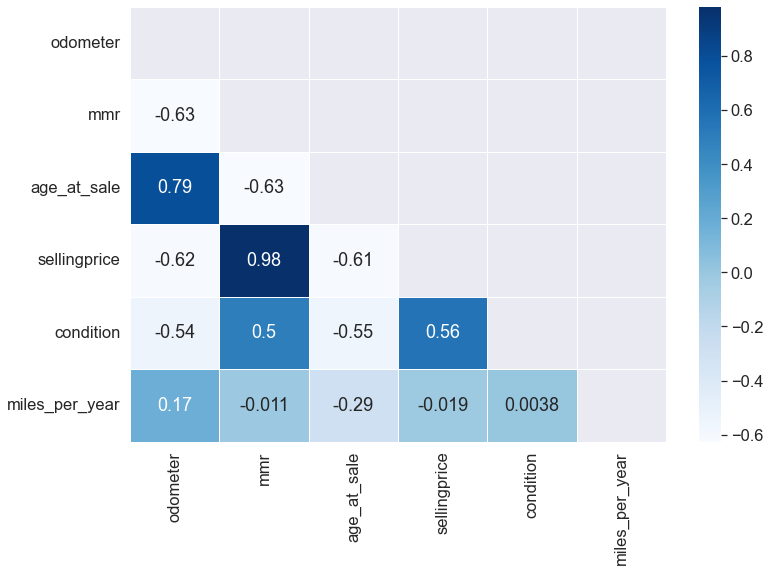

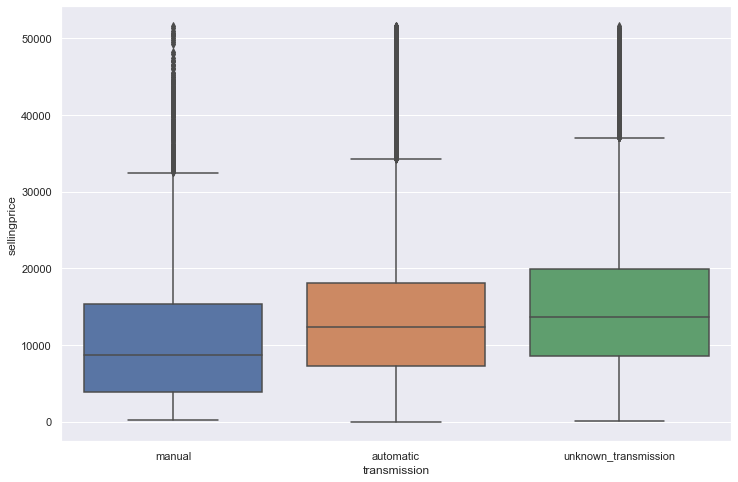

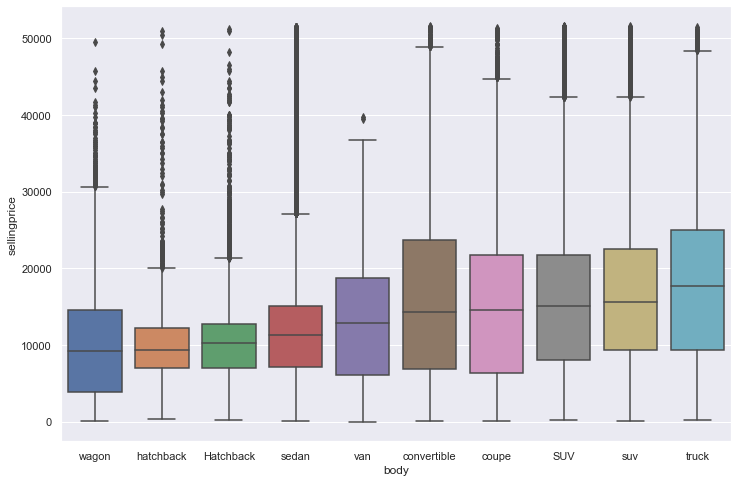

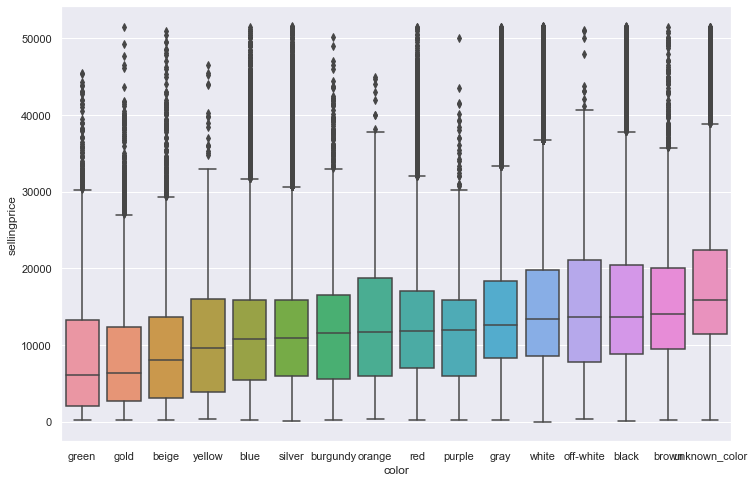

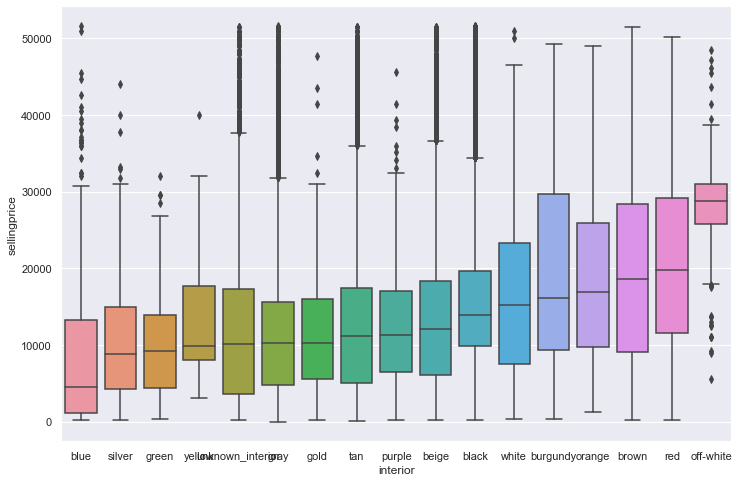

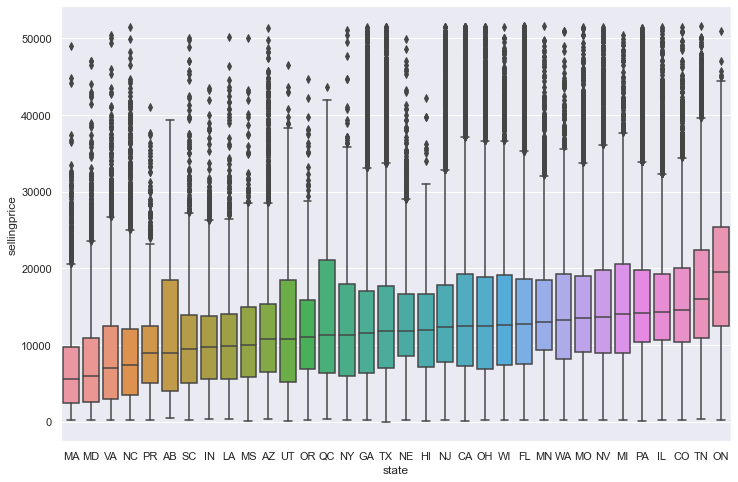

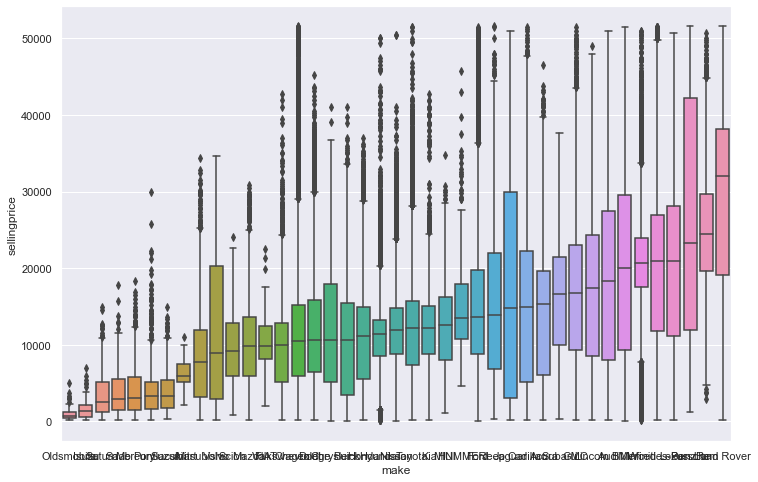

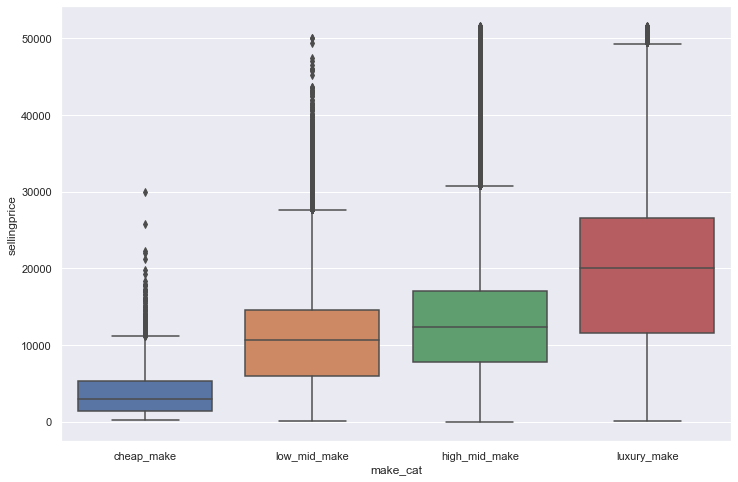

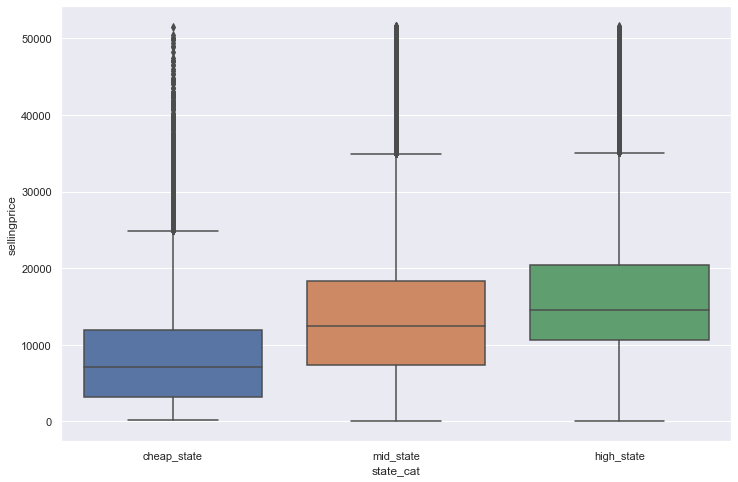

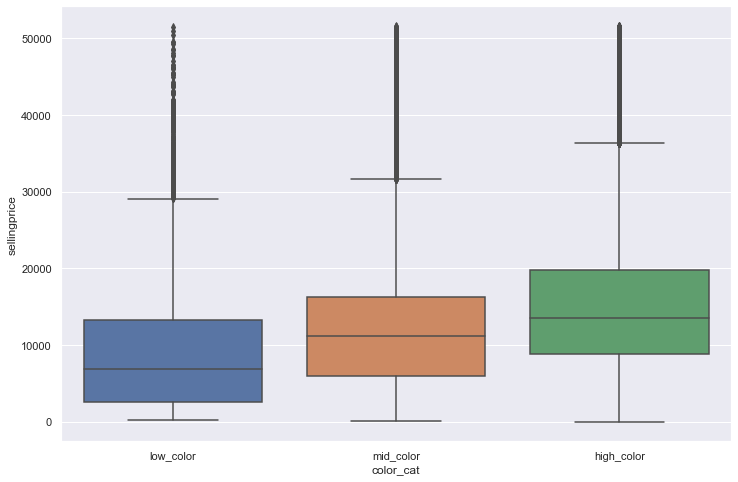

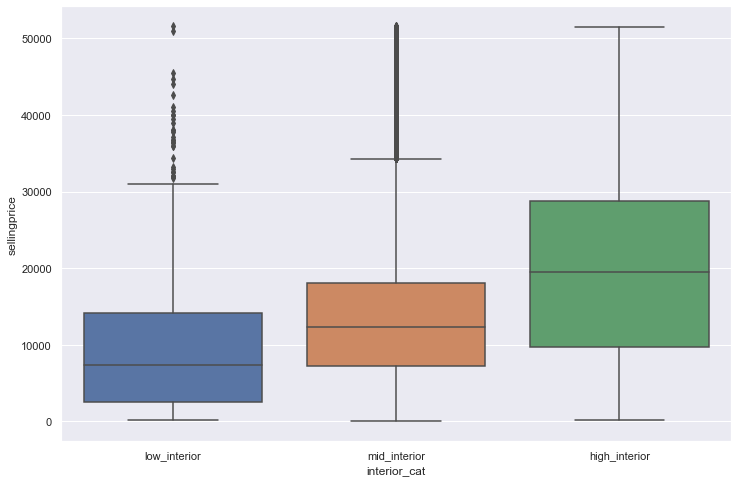

In [206]:
viz.corr_plot(train)

In [207]:
def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

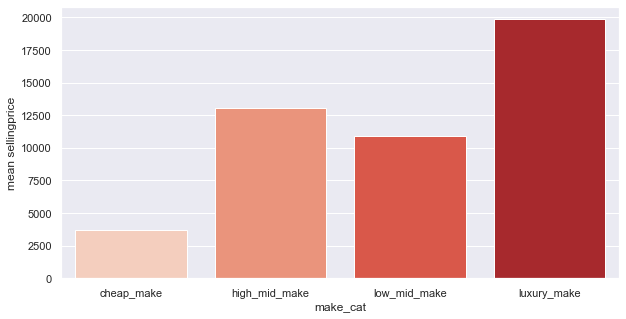

In [208]:
compare_means(train, 'make_cat', 'sellingprice')

In [232]:
for cat in ['make_cat', 'state_cat', 'color_cat', 'interior_cat', 'body', 'transmission']:
    dummies = pd.get_dummies(df[cat], drop_first=True)
    df = pd.concat([df, dummies], axis=1)

In [233]:
df.columns.tolist()

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate',
 'saleyear',
 'age_at_sale',
 'miles_per_year',
 'make_cat',
 'state_cat',
 'color_cat',
 'interior_cat',
 'high_mid_make',
 'low_mid_make',
 'luxury_make',
 'high_state',
 'mid_state',
 'low_color',
 'mid_color',
 'low_interior',
 'mid_interior',
 'SUV',
 'convertible',
 'coupe',
 'hatchback',
 'sedan',
 'suv',
 'truck',
 'van',
 'wagon',
 'manual',
 'unknown_transmission']

In [234]:
features = [
 'condition',
 'mmr',
 'sellingprice',
 'age_at_sale',
 'miles_per_year',
 'high_mid_make',
 'low_mid_make',
 'luxury_make',
 'high_state',
 'mid_state',
 'low_color',
 'mid_color',
 'low_interior',
 'mid_interior',
 'SUV',
 'convertible',
 'coupe',
 'hatchback',
 'sedan',
 'suv',
 'truck',
 'van',
 'wagon',
 'manual',
 'unknown_transmission']

In [235]:
train, validate, test = wrangle.split_cars(df[features])

In [236]:
X_train = train.drop(columns = 'sellingprice')
X_val = validate.drop(columns= 'sellingprice')
X_test = test.drop(columns='sellingprice')

y_train = train.sellingprice
y_val = validate.sellingprice
y_test = test.sellingprice

In [237]:
# create model with input scaling
pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [238]:
# fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [239]:
# predict
yhat_train = pipeline.predict(X_train)
yhat_val = pipeline.predict(X_val)

In [240]:
rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
rmse_val = mean_squared_error(y_val, yhat_val, squared=False)
r2_train = r2_score(y_train, yhat_train)
r2_val = r2_score(y_val, yhat_val)

In [241]:
print(rmse_train, r2_train)

1471.0546167954762 0.9717775614134435


In [242]:
print(rmse_val, r2_val)

1494.3704863985854 0.9709043641084835


8756.519699191476

    Predicting mean selling price (Mean baseline):  $8756 
    Predicting MMR (MMR baseline):  $1659

In [76]:
y_train['mean'] = y_train.sellingprice.mean()

In [77]:
y_train

,sellingprice,mmr,mean
336904,19000,17850,13564.959325
378530,4000,3725,13564.959325
429647,12700,13750,13564.959325
304344,2000,2575,13564.959325
61836,35000,34800,13564.959325
...,...,...,...
322784,17000,21400,13564.959325
367772,3600,2325,13564.959325
174249,19100,19500,13564.959325
338057,23400,22600,13564.959325
